In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import seaborn as sns
import numpy as np
from IPython.display import Audio
import os

In [ ]:

speech_dir = "Audio_Speech_Actors_01-24"
song_dir = "Audio_Song_Actors_01-24"

emotion_map = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

def extract_emotion_from_filename(filename):
    """Extracts emotion from RAVDESS filename."""
    parts = filename.split("-")
    emotion_code = parts[2]
    return emotion_map.get(emotion_code, "unknown")

def load_data(directory):
    """Loads RAVDESS wav files from a directory and returns a DataFrame with path and label."""
    data = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".wav"):
                full_path = os.path.join(root, file)
                label = extract_emotion_from_filename(file)
                data.append({"path": full_path, "labels": label})
    return pd.DataFrame(data)

# Load speech and song data
df_speech = load_data(speech_dir)
df_song = load_data(song_dir)

# Combine into one DataFrame
df_combined = pd.concat([df_speech, df_song], ignore_index=True)

df_combined = df_combined.sample(frac=1).reset_index(drop=True)

print(df_combined)


                                                   path   labels
0     Audio_Speech_Actors_01-24\Actor_15\03-01-03-01...    happy
1     Audio_Song_Actors_01-24\Actor_17\03-02-04-02-0...      sad
2     Audio_Speech_Actors_01-24\Actor_17\03-01-05-01...    angry
3     Audio_Speech_Actors_01-24\Actor_16\03-01-05-02...    angry
4     Audio_Speech_Actors_01-24\Actor_18\03-01-05-01...    angry
...                                                 ...      ...
2447  Audio_Speech_Actors_01-24\Actor_13\03-01-06-02...  fearful
2448  Audio_Song_Actors_01-24\Actor_09\03-02-03-02-0...    happy
2449  Audio_Speech_Actors_01-24\Actor_08\03-01-01-01...  neutral
2450  Audio_Speech_Actors_01-24\Actor_06\03-01-02-01...     calm
2451  Audio_Speech_Actors_01-24\Actor_03\03-01-03-01...    happy

[2452 rows x 2 columns]


In [6]:
df_combined['labels'].value_counts()

labels
happy        376
sad          376
angry        376
calm         376
fearful      376
surprised    192
disgust      192
neutral      188
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='labels'>

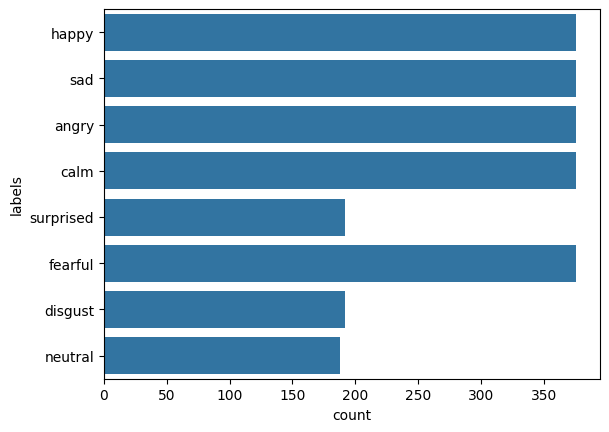

In [7]:
sns.countplot(df_combined['labels'])

In [8]:
def show_data(data, sr, emotion):
  plt.figure(figsize=(10, 4))
  librosa.display.waveshow(data, sr=sr)
  plt.title(emotion, size=15)
  plt.show()

def spectogram(data, sr, emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(10, 4))
  librosa.display.waveshow(data, sr=sr)
  plt.title(emotion, size=15)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

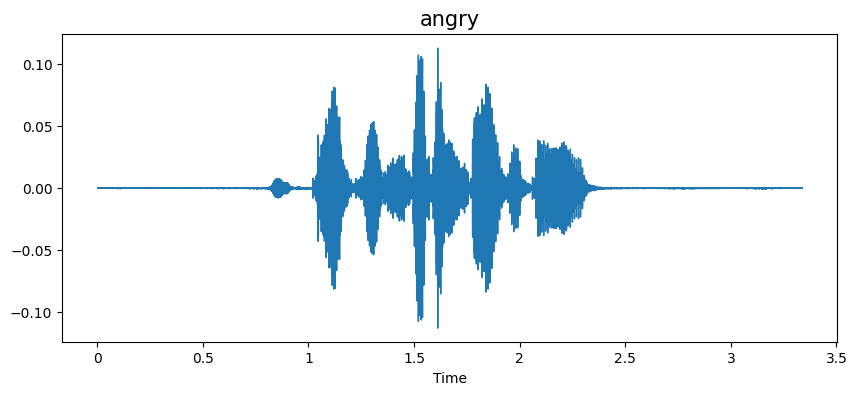

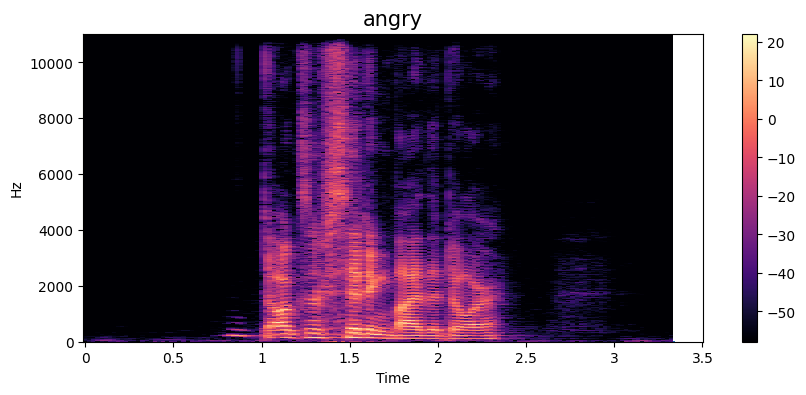

In [9]:
emotion = emotion_map['05']
path = df_combined.iloc[0]['path']
data, sr = librosa.load(path)
show_data(data, sr, emotion)
spectogram(data, sr, emotion)
Audio(path)

In [10]:
def extract_mfccs(filename):
  y, sr = librosa.load(filename, duration=3, offset=0.5)
  mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfccs

In [11]:
extract_mfccs(df_combined['path'][0])

array([-5.7640466e+02,  8.1406525e+01, -1.0855554e+01,  1.6100306e+01,
        1.6025091e+01, -1.3990641e+00, -2.4494553e+00, -2.9226115e+00,
       -4.8273158e+00, -2.0350924e+00,  3.6524820e-01,  1.5824668e+00,
       -1.2743319e+00,  1.4008684e-01,  3.8879195e-01, -1.5721992e+00,
       -7.4200130e-01, -3.0303361e+00,  1.2550428e+00, -2.7867050e+00,
       -3.1767569e+00, -1.6446846e+00, -3.6071858e+00,  2.9999745e-01,
       -4.7047272e+00,  1.1673589e+00, -2.6545854e+00,  1.5252720e+00,
       -1.8668507e+00,  3.2375102e+00,  1.7898654e+00,  3.0939767e+00,
        1.3632030e+00,  1.1264099e+00, -6.6760617e-01,  2.0786071e+00,
        1.1122060e-01,  5.9837990e-02, -2.4751289e-01, -1.1821421e+00],
      dtype=float32)

In [12]:
features = []
label_values = []

for _, row in df_combined.iterrows():
    path = row['path']
    label = row['labels']
    mfcc = extract_mfccs(path)

    if mfcc is not None:
        features.append(mfcc)
        label_values.append(label)

# Convert to NumPy arrays
X = np.array(features)
Y = np.array(label_values)

In [13]:
X

array([[-5.76404663e+02,  8.14065247e+01, -1.08555536e+01, ...,
         5.98379895e-02, -2.47512892e-01, -1.18214214e+00],
       [-3.94456482e+02,  7.01080399e+01, -2.44753761e+01, ...,
         8.62996387e+00,  1.42977486e+01,  2.12667999e+01],
       [-5.64078674e+02,  7.33319397e+01,  4.78511047e+00, ...,
        -1.37620175e+00, -2.19291496e+00, -1.34362638e+00],
       ...,
       [-6.46220459e+02,  7.56114807e+01,  4.02835083e+00, ...,
         7.14715672e+00,  2.29970169e+00,  5.99210739e+00],
       [-6.30987122e+02,  7.24109955e+01, -4.89916182e+00, ...,
         5.32216787e+00,  6.42877674e+00,  1.00066595e+01],
       [-5.03276337e+02,  5.50956841e+01, -7.74638033e+00, ...,
         1.71736255e-01, -1.07621384e+00,  6.36971712e-01]], dtype=float32)

In [14]:
Y

array(['happy', 'sad', 'angry', ..., 'neutral', 'calm', 'happy'],
      dtype='<U9')

In [15]:
X=np.expand_dims(X,-1)
X.shape

(2452, 40, 1)

In [16]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df_combined[['labels']])

In [17]:
y=y.toarray()

In [18]:
y.shape

(2452, 8)

### Model

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,GRU, Bidirectional
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [ ]:
# Encode labels
raw_y = df_combined['labels'].values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(raw_y)           
y_categorical = to_categorical(y_encoded)            

# Reshape for LSTM
X_reshaped = X.reshape(X.shape[0], 40, 1)

X_train, X_test, y_train, y_test, y_train_encoded, y_test_encoded = train_test_split(
    X_reshaped, y_categorical, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ------------------------------


In [ ]:
# Data Augmentation 
from imblearn.over_sampling import RandomOverSampler
# For oversampling, flatten X_train to 2D (samples, features)
X_train_flat = X_train.reshape(X_train.shape[0], -1)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_encoded_resampled = ros.fit_resample(X_train_flat, y_train_encoded)

y_train_resampled = to_categorical(y_train_encoded_resampled)

X_train_resampled = X_train_resampled.reshape(-1, 40, 1)


### Model Based on CRNN

In [ ]:

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from keras.layers import LSTM, Dropout, Dense

model = Sequential([
    Conv1D(128, kernel_size=3, activation='relu', padding='same', input_shape=(40, 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(256, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(256, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    LSTM(128, return_sequences=True),
    LSTM(256, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train
history = model.fit(
    X_train_resampled,
    y_train_resampled, 
    epochs=50, batch_size=32, 
    validation_data=(X_test, y_test),
    callbacks=[early_stop, reduce_lr]
    )


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 40, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 40, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 20, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 20, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 10, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 10, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 10, 256)        │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 10, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 5, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 5, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 5, 128)         │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 5, 256)         │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 5, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 972,552 (3.71 MB)

 Trainable params: 971,272 (3.71 MB)

 Non-trainable params: 1,280 (5.00 KB)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.2101 - loss: 1.9634 - val_accuracy: 0.0916 - val_loss: 2.1885 - learning_rate: 0.0010
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3222 - loss: 1.7319 - val_accuracy: 0.2729 - val_loss: 1.7656 - learning_rate: 0.0010
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4449 - loss: 1.5297 - val_accuracy: 0.3971 - val_loss: 1.5582 - learning_rate: 0.0010
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5071 - loss: 1.3620 - val_accuracy: 0.4399 - val_loss: 1.5016 - learning_rate: 0.0010
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5276 - loss: 1.2639 - val_accuracy: 0.4684 - val_loss: 1.3509 - learning_rate: 0.0010
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5462 - loss: 1.2347 - val_accuracy: 0.4949 - val_loss: 1.2968 - learning_rate: 0.0010
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5620 - loss: 1.1623 - val_acc

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
F1 Score (macro): 0.7304

Classification Report:
              precision    recall  f1-score   support

       angry       0.81      0.84      0.82        75
        calm       0.83      0.76      0.79        75
     disgust       0.75      0.77      0.76        39
     fearful       0.68      0.65      0.67        75
       happy       0.66      0.71      0.68        75
     neutral       0.63      0.84      0.72        38
         sad       0.70      0.64      0.67        75
   surprised       0.81      0.67      0.73        39

    accuracy                           0.73       491
   macro avg       0.73      0.73      0.73       491
weighted avg       0.73      0.73      0.73       491



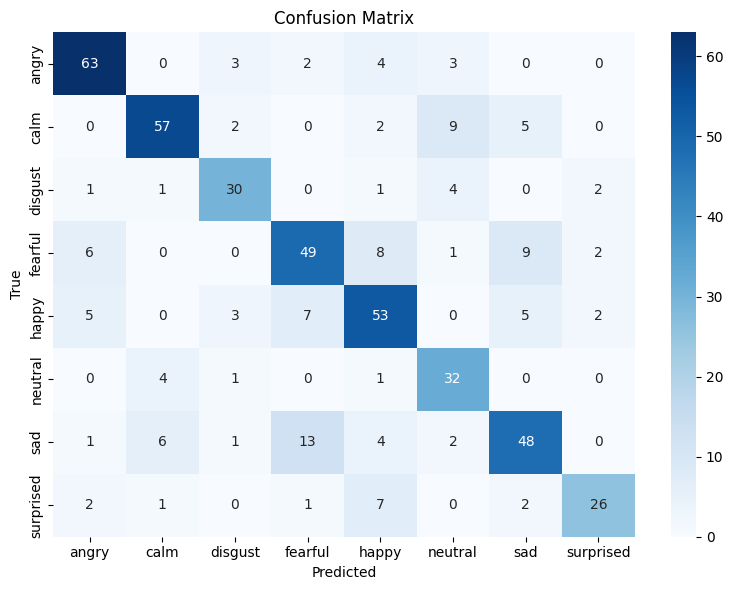

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert to predicted label indices
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# F1 Score (macro: treats all classes equally)
f1 = f1_score(y_test_encoded, y_pred_classes, average='macro')
print(f"F1 Score (macro): {f1:.4f}")

# Classification report (includes precision, recall, F1)
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))


import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_encoded, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()



In [27]:
model.save("cnn+lstm_model.h5")